The trapezoid rule, predictor corrector method for 

$$\frac{du}{dt} = u + t$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the right side function
def f(u, t):
    return u+t

In [3]:
# the parameters
a, b = [0, 3]
u0 = 1
h = 0.1
t = np.arange(a, b+h, h)

In [4]:
#initializing the solutions
u = np.zeros(len(t))
u[0]= u0
u_exact = np.zeros(len(t))
u_exact[0] = u0


In [5]:
# Euler's forward abd analytic solution
for k in range(1, len(t)):
    u[k] = u[k-1]+h*f(t[k-1], u[k-1])
    u_exact[k]= -t[k]-1+2*np.exp(t[k])

In [6]:
# Trapexoid predictor-corrector method
pred = u0
cort = np.zeros(len(t))
cort[0]= u0
for k in range(1, len(t)):
    pred = pred + h*f(t[k-1], cort[k-1]) #predictor
    cort[k] = cort[k-1]+0.5*h*(f(t[k],pred ) + f(t[k-1], cort[k-1] ))

In [7]:
#print the solution
print("\n     t", end = " ")
print("       u", end = " ")
print("        cort", end= " ")
print("       u_exact", end =" ")
print("      e_Eulur", end =" ")
print("     e_PreCor", end =" ")
print("\n        ---------------------------------------------------------------------------")
for i in range(len(t)-5, len(t)):          #print the last five
    print("\n{:10.4f}".format(t[i]), end = " ")
    print("{:10.4f}".format(u[i]), end = " ")
    print("{:12.4f}".format(cort[i]), end= " ")
    print("{:10.4f}".format(u_exact[i]), end = " ")
    print("{:12.4f}".format(abs(u[i]-u_exact[i])), end=" ")
    print("{:12.4f}".format(abs(cort[i]-u_exact[i])), end=" ")

print()


     t        u         cort        u_exact       e_Eulur      e_PreCor 
        ---------------------------------------------------------------------------

    2.6000    20.2364      22.4809    23.3275       3.0911       0.8466 
    2.7000    22.5200      25.0777    26.0595       3.5395       0.9817 
    2.8000    25.0420      27.9533    29.0893       4.0473       1.1360 
    2.9000    27.8262      31.1365    32.4483       4.6221       1.3118 
    3.0000    30.8988      34.6590    36.1711       5.2723       1.5121 


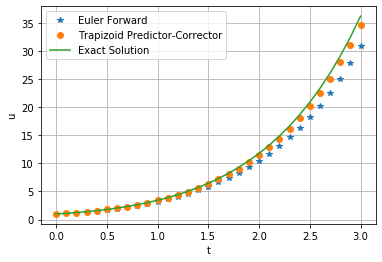

In [8]:
# Plot
plt.plot(t, u, '*', t, cort, 'o', t, u_exact, '-')
plt.grid(True)
plt.xlabel('t'); plt.ylabel('u')
plt.legend(('Euler Forward', 'Trapizoid Predictor-Corrector', 'Exact Solution'), loc = 0)
plt.show()